# Einfaches Neuronales Netz für Ziffernerkennung mit MNIST-Datensatz

Dies ist der Code mit Erklärungen, es werden keine Python-Kenntnisse vorausgesetzt. Die Anmerkungen beziehen sich immer auf die Code-Zelle überbei.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zuerst werden die Python-Bibliotheken pandas, numpy und matplotlib importiert. Bibliotheken sind Erweiterungen zu den Funktionen, die Python schon kann. Pandas wird zur Darstellung, Verarbeitung und Analyse von Daten verwendet. Numpy wird zur Darstellung von Matrizen und zur Berechnung von Operationen auf diesen verwendet. Matplotlib wird zur Visualisierung verwendet. 

In [2]:
data=pd.read_csv("data/mnist_train.csv", header=None)

Als nächstes werden die Daten eingelesen und als "data" gespeichert. Dies geschieht mithilfe der Pandas-Bibliothek.

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Hier werden nur kurz die Daten in einer Tabelle dargestellt (die erste Zeile und Spalte sind nur zur Nummerierung dieser gedacht). Hier kann man  sehen, dass in der ersten Spalte die Ziffer (hier: erste Zeile: 5, zweite Zeile: 0, dritte Zeile: 4, usw.) stetht, die von den folgenden Zahlen/Helligkeitswerten zwischen 0 und 255 codiert wird (hier sieht man nur 0er). Diese Helligkeitswerte repräsentieren die einzelnen Pixel und deren Helligkeit.
Beispielsweise die 115. Zeile (bzw. die 115. Ziffer) sieht wie folgt aus:  
![alt text](image.png)

In [ ]:
data=np.array(data)

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


Nun werden die Daten in eine Matrix verpackt, um mit diesen Daten sehr einfach rechnen zu können.

In [ ]:
zeilen, spalten=data.shape 
np.random.shuffle(data)

Es wird nur kurz ausgelesen, wie viele Zeilen und Spalten die Daten haben, um später mit diesen Werten zu rechnen. Anschließend werden 

In [6]:
data_ueberpruefen=data[0:1000].T
label_ueb=data_ueberpruefen[0]
daten_ueb=data_ueberpruefen[1:spalten]

In [7]:
data_trainieren=data[1000:zeilen].T #Y label, X daten
label_train=data_trainieren[0]
daten_train=data_trainieren[1:spalten]
daten_train=daten_train/255
_,zeilen_train=daten_train.shape
print(zeilen_train)

59000


In [8]:
def matrizen_erstellen():
    w1=np.random.rand(16,784)-0.5
    b1=np.random.rand(16,1)-0.5
    w2=np.random.rand(16,16)-0.5
    b2=np.random.rand(16,1)-0.5
    w3=np.random.rand(10,16)-0.5
    b3=np.random.rand(10,1)-0.5
    return w1, b1, w2, b2, w3, b3

In [9]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

In [10]:
def Abfrage(w1,b1,w2,b2,w3,b3, eingabe):
    z1=w1.dot(eingabe)+b1
    a1=sigmoid(z1)
    z2=w2.dot(a1)+b2
    a2=sigmoid(z2)
    z3=w3.dot(a2)+b3
    a3=sigmoid(z3)
    return z1,a1,z2,a2,z3,a3


In [11]:
def eins_aus_n(eingabe):
    gewuenscht=np.zeros((eingabe.size, eingabe.max()+1))
    gewuenscht[np.arange(eingabe.size),eingabe]=1
    gewuenscht=gewuenscht.T
    return gewuenscht

In [12]:
def ableitung_sigmoid(eingabe):
    return sigmoid(eingabe)*(1-sigmoid(eingabe))
sigmoid(3)

np.float64(0.9525741268224334)

In [13]:
def backpropagation(z1,a1,z2,a2,w2,a3,w3, labels, daten): 
    dz3=a3-eins_aus_n(labels)
    dw3=1/zeilen*dz3.dot(a2.T)
    db3=1/zeilen*np.sum(dz3)
    dz2=w3.T.dot(dz3)*ableitung_sigmoid(z2)
    dw2=1/zeilen*dz2.dot(a1.T)
    db2=1/zeilen*np.sum(dz2)
    dz1=w2.T.dot(dz2)*ableitung_sigmoid(z1)
    dw1=1/zeilen*dz1.dot(daten.T)
    db1=1/zeilen*np.sum(dz1)
    return dw1,db1,dw2,db2,dw3,db3

In [14]:
def parameter_aktualisieren(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lernrate):
    w1=w1-lernrate*dw1
    b1=b1-lernrate*db1
    w2=w2-lernrate*dw2
    b2=b2-lernrate*db2
    w3=w3-lernrate*dw3
    b3=b3-lernrate*db3
    return w1,b1,w2,b2,w3,b3

In [15]:
def vorhersage_machen(a3):
    return np.argmax(a3,0)

In [16]:
def wie_akkurat(vorhersage, label):
    print(vorhersage, label)
    return np.sum(vorhersage==label)/label.size

In [17]:
def gradientenabstieg(daten,label,wiederholungen,lernrate):
    w1,b1,w2,b2,w3,b3=matrizen_erstellen()
    for i in range(wiederholungen):
        z1,a1,z2,a2,z3,a3=Abfrage(w1,b1,w2,b2,w3,b3, daten)
        dw1,db1,dw2,db2,dw3,db3=backpropagation(z1,a1,z2,a2,w2,a3,w3,label,daten)
        w1,b1,w2,b2,w3,b3=parameter_aktualisieren(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lernrate)
        if i%50==0:
            print("Wiederholungen: ",i)
            print("Accuracy: ", wie_akkurat(vorhersage_machen(a3),label))
    return w1,b1,w2,b2,w3,b3

In [18]:
w1, b1, w2, b2, w3, b3=gradientenabstieg(daten_train,label_train, 100, 0.1)

Wiederholungen:  0
[3 3 3 ... 3 3 3] [2 6 5 ... 2 3 0]
Accuracy:  0.1026271186440678
Wiederholungen:  50
[8 1 3 ... 1 1 3] [2 6 5 ... 2 3 0]
Accuracy:  0.10388135593220339


In [19]:
def make_predictions(X, W1, b1, W2, b2, w3, b3):
    _, _, _, _, _, A2 = Abfrage(W1, b1, W2, b2, w3, b3, X)
    predictions = vorhersage_machen(A2)
    return predictions

In [20]:
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = daten_train[:, index, None]
    prediction = make_predictions(daten_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  4


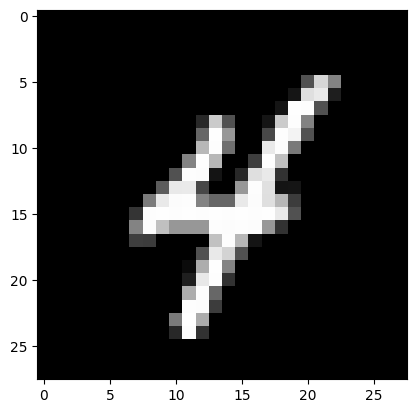

[[ 0.12336527  0.48386184 -0.30628674 ...  0.22263053  0.47631868
   0.38133354]
 [ 0.3316691  -0.11212064  0.37906926 ... -0.46926983  0.00105697
   0.20478633]
 [-0.06128061 -0.26721761 -0.04033898 ...  0.2626601  -0.37561477
   0.26626183]
 ...
 [ 0.23590984 -0.32442968 -0.08357422 ...  0.34176275  0.36661582
   0.15138396]
 [-0.49704914 -0.34076175 -0.12460649 ...  0.0430053   0.16204212
  -0.27332708]
 [-0.30858459  0.20583062  0.13919683 ... -0.1051754  -0.34202182
  -0.30969414]]
[[ 0.08156395  0.24819374 -0.59040074 -0.02133691 -0.56200942 -0.31656326
  -0.01505452  0.2725677  -0.49241335  0.3435626  -0.03281559 -0.61641037
   0.05199324 -0.47440775  0.27724265  0.13311069]
 [-0.34189676 -0.13222526 -0.34675813 -0.25681029 -0.3493601   0.01542718
   0.20136609 -0.42072303 -0.41480345 -0.25546277 -0.21632136  0.39413769
   0.3048606   0.22993829  0.43134502  0.28776095]
 [-0.48271283 -0.50482252  0.32749531 -0.11552772 -0.23308387  0.24577751
  -0.57593839  0.33639244  0.1738048

In [21]:
test_prediction(115, w1, b1, w2, b2, w3, b3)
print(w1)
print(w3)


In [22]:
dev_predictions = make_predictions(daten_ueb, w1, b1, w2, b2, w3, b3)
wie_akkurat(dev_predictions, label_ueb)

[1 1 1 1 1 1 1 6 7 0 0 1 2 1 7 6 5 7 7 1 1 2 1 2 1 3 1 1 1 1 1 6 1 1 1 1 6
 1 2 1 1 1 1 0 1 1 0 7 1 1 1 7 1 1 0 1 1 6 1 1 7 1 1 7 6 2 1 0 3 1 6 2 2 1
 2 1 5 1 2 1 1 6 1 0 1 7 1 2 1 1 1 9 2 2 1 0 7 1 1 1 7 6 7 1 9 1 2 2 0 3 7
 1 2 3 1 1 1 7 7 1 1 1 8 2 1 0 1 1 3 1 1 7 2 8 1 1 3 9 7 0 6 2 7 8 3 7 0 1
 1 0 3 9 1 2 0 1 1 1 0 1 1 2 1 7 2 1 5 1 1 5 1 0 1 1 8 1 1 7 1 0 1 8 1 2 7
 1 3 1 1 7 0 1 6 6 7 6 2 1 6 8 3 5 2 1 0 1 1 0 1 0 1 1 1 1 1 7 2 6 1 1 1 3
 3 1 1 7 9 0 3 6 0 1 1 1 1 7 6 1 1 3 1 1 1 7 1 3 7 6 1 8 1 8 1 2 1 1 2 5 6
 1 7 1 7 1 6 1 6 2 2 1 3 7 2 7 1 6 1 1 1 2 6 0 2 1 1 7 3 1 6 1 1 1 1 1 1 2
 1 2 1 1 2 1 7 1 6 7 7 2 0 6 1 1 1 1 1 0 1 5 5 1 1 7 1 1 1 5 2 0 5 2 1 7 1
 0 5 3 8 8 0 7 1 1 7 2 6 1 2 1 1 7 5 7 1 1 7 1 1 1 0 1 6 7 1 5 3 0 1 8 1 1
 1 0 1 7 1 1 2 1 1 7 1 7 1 1 1 6 1 1 5 1 1 1 1 1 2 6 1 7 1 1 7 1 1 1 1 1 3
 2 1 7 1 7 7 7 0 1 1 1 1 1 1 2 2 8 1 1 7 2 7 1 1 7 2 1 7 7 1 8 7 1 1 1 6 0
 3 1 1 2 1 1 1 3 9 7 1 6 1 6 2 1 0 7 1 7 1 1 1 5 7 7 1 1 3 0 1 1 1 1 7 1 1
 7 1 6 1 1 3 7 7 1 1 1 7 

C:\Users\magni\AppData\Local\Temp\ipykernel_4852\2286656065.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-input))


np.float64(0.14)

# Quellen
ln[1]:  
https://numpy.org/ [Zugriff: 01.02.2026]  
https://pandas.pydata.org/about/ [Zugriff: 01.02.2026]  
https://matplotlib.org/ [Zugriff: 01.02.2026]  


